# Assignment #1 : Performance Benchmarking of Cryptographic Mechanisms

### A. Generate random text files with the following sizes 
        • For AES (in bytes): 8, 64, 512, 4096, 32768, 262144, 2097152
        • For SHA (in bytes): 8, 64, 512, 4096, 32768, 262144, 2097152
        • For RSA (in bytes): 2, 4, 8, 16, 32, 64, 128

In [1]:
import os
import random
import string
import os
import timeit
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import hashes

In [87]:
# Generates a .txt file given a specified size
def generate_random_txt_file(filename, size):
    with open(filename, "w") as f:
        f.write(''.join(random.choices(string.ascii_letters + string.digits, k=size)))

# Size of the files in bytes for AES, SHA and RSA
sizes_aes = [8, 64, 512, 4096, 32768, 262144, 2097152]  
sizes_sha = [8, 64, 512, 4096, 32768, 262144, 2097152]  
sizes_rsa = [2, 4, 8, 16, 32, 64, 128]  

os.makedirs("random_text_files", exist_ok=True)

# Generate files for AES, SHA and RSA
for size in sizes_aes:
    generate_random_txt_file(f"random_text_files/aes_{size}.txt", size)

for size in sizes_sha:
    generate_random_txt_file(f"random_text_files/sha_{size}.txt", size)

for size in sizes_rsa:
    generate_random_txt_file(f"random_text_files/rsa_{size}.txt", size)

When this script is executed, it generates random text files of sizes previously mentioned in the exercise, inside a folder named "random_text_files". The script ensures the directory exists before creating the files.

### B. Encrypt and decrypt all these files using AES. Employ a key of 256 bits. Measure the time it takes to encrypt and decrypt each of the files. To do this, you might want to use the python module timeit. Make sure to produce statistically significant results.

Size: 8 bytes - Encryption: 379.10 µs - Decryption: 302.40 µs
Size: 64 bytes - Encryption: 250.40 µs - Decryption: 94.50 µs
Size: 512 bytes - Encryption: 173.60 µs - Decryption: 70.70 µs
Size: 4096 bytes - Encryption: 328.30 µs - Decryption: 156.80 µs
Size: 32768 bytes - Encryption: 238.20 µs - Decryption: 174.10 µs
Size: 262144 bytes - Encryption: 1306.20 µs - Decryption: 1081.20 µs
Size: 2097152 bytes - Encryption: 8030.90 µs - Decryption: 7287.50 µs




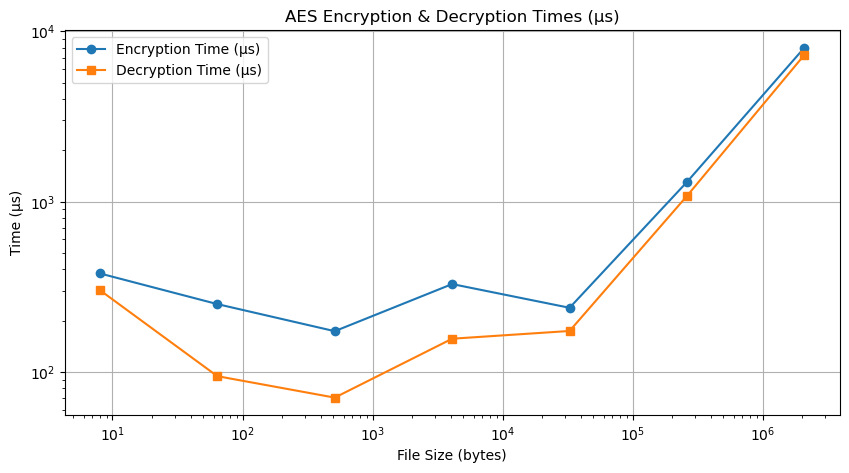

In [88]:
# AES encryption function
def encrypt_aes(data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    return cipher.encryptor().update(data) + cipher.encryptor().finalize()

# AES decryption function
def decrypt_aes(encrypted_data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    return cipher.decryptor().update(encrypted_data) + cipher.decryptor().finalize()

# File sizes to test
sizes_aes = [8, 64, 512, 4096, 32768, 262144, 2097152]
encryption_times, decryption_times = [], []

# Generate AES key (256 bits) and IV (128 bits)
key, iv = os.urandom(32), os.urandom(16)

for size in sizes_aes:
    filename = f"random_text_files/aes_{size}.txt"
    with open(filename, "rb") as f:
        data = f.read()
    
    # Measure encryption time in microseconds
    enc_time = (timeit.timeit(lambda: encrypt_aes(data, key, iv), number=1)) * 1e6
    encryption_times.append(enc_time)
    encrypted_data = encrypt_aes(data, key, iv)
    
    # Measure decryption time in microseconds
    dec_time = (timeit.timeit(lambda: decrypt_aes(encrypted_data, key, iv), number=1)) * 1e6
    decryption_times.append(dec_time)
    print(f"Size: {size} bytes - Encryption: {enc_time:.2f} µs - Decryption: {dec_time:.2f} µs")

# Plot results
print("\n")
plt.figure(figsize=(10, 5))
plt.plot(sizes_aes, encryption_times, marker='o', label='Encryption Time (µs)')
plt.plot(sizes_aes, decryption_times, marker='s', label='Decryption Time (µs)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("File Size (bytes)")
plt.ylabel("Time (µs)")
plt.title("AES Encryption & Decryption Times (µs)")
plt.legend()
plt.grid(True)
plt.show()

After encrypting and decrypting the files using AES **one time**, the resulting plot does not reveal a clear pattern. This lack of consistency may be attributed to variability in system performance or other external factors influencing a single execution. Consequently, it is not possible to identify definitive trends or draw reliable conclusions based on these results.

### Do results change if you run a fixed algorithm over the same file multiple times?

Size: 8 bytes - Encryption: 34.758500 µs - Decryption: 27.172800 µs
Size: 64 bytes - Encryption: 28.866000 µs - Decryption: 28.263700 µs
Size: 512 bytes - Encryption: 28.734400 µs - Decryption: 29.037600 µs
Size: 4096 bytes - Encryption: 50.852000 µs - Decryption: 49.708500 µs
Size: 32768 bytes - Encryption: 124.142000 µs - Decryption: 136.274000 µs
Size: 262144 bytes - Encryption: 687.226000 µs - Decryption: 677.931000 µs
Size: 2097152 bytes - Encryption: 5881.766000 µs - Decryption: 5078.642000 µs




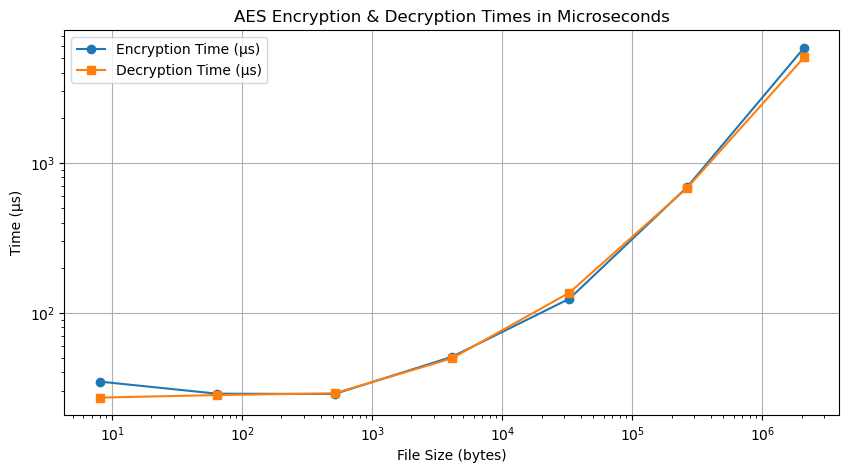

In [89]:
# Função para ler arquivos existentes
def read_file_contents(file_path):
    with open(file_path, "rb") as f:
        return f.read()

# Funções de criptografia e descriptografia AES
def encrypt_aes(data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    return cipher.encryptor().update(data) + cipher.encryptor().finalize()

def decrypt_aes(encrypted_data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    return cipher.decryptor().update(encrypted_data) + cipher.decryptor().finalize()

# Configuração de arquivos e chaves
input_dir = "random_text_files"
sizes_aes = [8, 64, 512, 4096, 32768, 262144, 2097152]  # Tamanhos dos arquivos gerados no Exercício A
aes_encryption_times, aes_decryption_times = [], []

# Gerar chave AES (256 bits) e IV (128 bits)
key, iv = os.urandom(32), os.urandom(16)

for size in sizes_aes:
    file_path = os.path.join(input_dir, f"aes_{size}.txt")
    
    if not os.path.exists(file_path):
        print(f"Arquivo não encontrado: {file_path}")
        continue  # Pula para o próximo tamanho
    
    data = read_file_contents(file_path)  # Lê os dados do arquivo
    iterations = 1000 if size <= 4096 else 100  # Ajusta o número de iterações

    # Medir tempo de criptografia
    enc_time = (timeit.timeit(lambda: encrypt_aes(data, key, iv), number=iterations) / iterations) * 1e6
    aes_encryption_times.append(enc_time)
    
    # Criptografar os dados para medir a descriptografia
    encrypted_data = encrypt_aes(data, key, iv)
    
    # Medir tempo de descriptografia
    dec_time = (timeit.timeit(lambda: decrypt_aes(encrypted_data, key, iv), number=iterations) / iterations) * 1e6
    aes_decryption_times.append(dec_time)
    
    print(f"Size: {size} bytes - Encryption: {enc_time:.6f} µs - Decryption: {dec_time:.6f} µs")

# Plotar os resultados
print("\n")
plt.figure(figsize=(10, 5))
plt.plot(sizes_aes, aes_encryption_times, marker='o', label='Encryption Time (µs)')
plt.plot(sizes_aes, aes_decryption_times, marker='s', label='Decryption Time (µs)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("File Size (bytes)")
plt.ylabel("Time (µs)")
plt.title("AES Encryption & Decryption Times in Microseconds")
plt.legend()
plt.grid(True)
plt.show()

The program encrypts and decrypts files of different sizes using AES-256, measuring execution times. A random 256-bit key and 128-bit IV are used for security. Smaller files (≤ 4096 bytes) are processed 1000 times, while larger ones are run 100 times for statistical significance.

Encryption and decryption times are similar because AES operates symmetrically, with both processes involving nearly identical steps. 

Running the algorithm multiple times on the same file reveals a consistent pattern. The plot shows that execution time scales proportionally with file size, confirming AES's predictable performance behavior.


### And what if you run an algorithm over multiple randomly generated files of fixed size?


Size: 8 bytes - Avg Encryption: 60.350000 µs - Avg Decryption: 68.760000 µs
Size: 64 bytes - Avg Encryption: 58.820000 µs - Avg Decryption: 47.880000 µs
Size: 512 bytes - Avg Encryption: 51.790000 µs - Avg Decryption: 52.470001 µs
Size: 4096 bytes - Avg Encryption: 52.090000 µs - Avg Decryption: 50.230000 µs
Size: 32768 bytes - Avg Encryption: 114.020000 µs - Avg Decryption: 111.180000 µs
Size: 262144 bytes - Avg Encryption: 548.600000 µs - Avg Decryption: 539.270000 µs
Size: 2097152 bytes - Avg Encryption: 4965.940000 µs - Avg Decryption: 4852.500001 µs




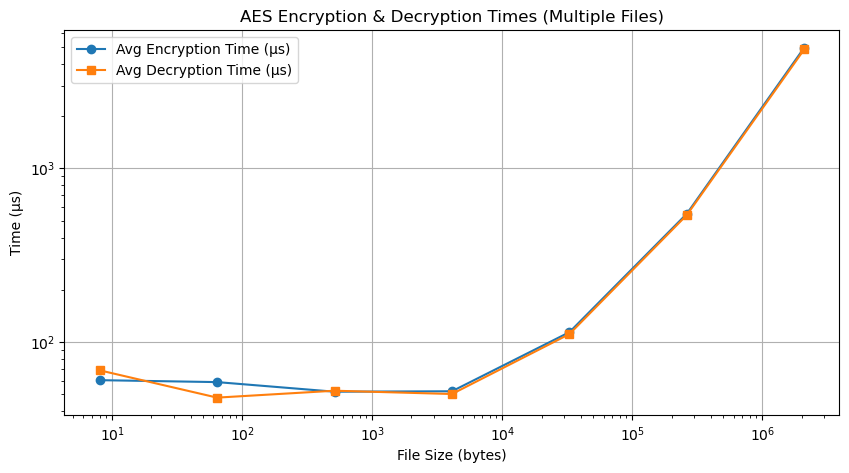

In [90]:
# AES encryption function
def encrypt_aes(data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    return cipher.encryptor().update(data) + cipher.encryptor().finalize()

# AES decryption function
def decrypt_aes(encrypted_data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    return cipher.decryptor().update(encrypted_data) + cipher.decryptor().finalize()

# File sizes and number of files to test
sizes_aes = [8, 64, 512, 4096, 32768, 262144, 2097152]
num_files_per_size = 10  # Number of random files to generate per size

encryption_times, decryption_times = [], []

# Generate AES key (256 bits)
key = os.urandom(32)

for size in sizes_aes:
    enc_times, dec_times = [], []

    for _ in range(num_files_per_size):
        data = os.urandom(size)  # Generate a new random file (data)
        iv = os.urandom(16)  # Generate a new IV for each encryption
        
        # Measure encryption time in microseconds
        enc_time = timeit.timeit(lambda: encrypt_aes(data, key, iv), number=1) * 1e6
        enc_times.append(enc_time)

        encrypted_data = encrypt_aes(data, key, iv)

        # Measure decryption time in microseconds
        dec_time = timeit.timeit(lambda: decrypt_aes(encrypted_data, key, iv), number=1) * 1e6
        dec_times.append(dec_time)

    # Compute the average time for this file size
    avg_enc_time = sum(enc_times) / num_files_per_size
    avg_dec_time = sum(dec_times) / num_files_per_size

    encryption_times.append(avg_enc_time)
    decryption_times.append(avg_dec_time)

    print(f"Size: {size} bytes - Avg Encryption: {avg_enc_time:.6f} µs - Avg Decryption: {avg_dec_time:.6f} µs")

# Plot results
print("\n")
plt.figure(figsize=(10, 5))
plt.plot(sizes_aes, encryption_times, marker='o', label='Avg Encryption Time (µs)')
plt.plot(sizes_aes, decryption_times, marker='s', label='Avg Decryption Time (µs)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("File Size (bytes)")
plt.ylabel("Time (µs)")
plt.title("AES Encryption & Decryption Times (Multiple Files)")
plt.legend()
plt.grid(True)
plt.show()


When the algorithm is run on multiple randomly generated files of the same size, some variations in execution times can be observed. These differences arise from the distinct data patterns, which can affect the efficiency of the encryption and decryption operations.

#### In conclusion, running the algorithm AES over the same file multiple times can have more stable results and it can be useful for benchmarking in a controlled input. However, running AES over multiple randomly generated files can capture the variations in performance and it avoids artificial optimizations like caching. It requires more data processing and the results may be noisier.

### C. Using the python module for RSA encryption and decryption, measure the time of RSA encryption and decryption for the file sizes listed in part A, with key of size 2048 bits (minimum recommended for RSA).

Size: 2 bytes - Encryption: 48.184900 µs - Decryption: 701.304100 µs
Size: 4 bytes - Encryption: 49.149200 µs - Decryption: 676.284700 µs
Size: 8 bytes - Encryption: 50.275300 µs - Decryption: 666.126500 µs
Size: 16 bytes - Encryption: 50.384600 µs - Decryption: 672.774300 µs
Size: 32 bytes - Encryption: 50.824000 µs - Decryption: 687.685000 µs
Size: 64 bytes - Encryption: 51.768000 µs - Decryption: 678.105000 µs
Size: 128 bytes - Encryption: 49.791000 µs - Decryption: 672.517000 µs




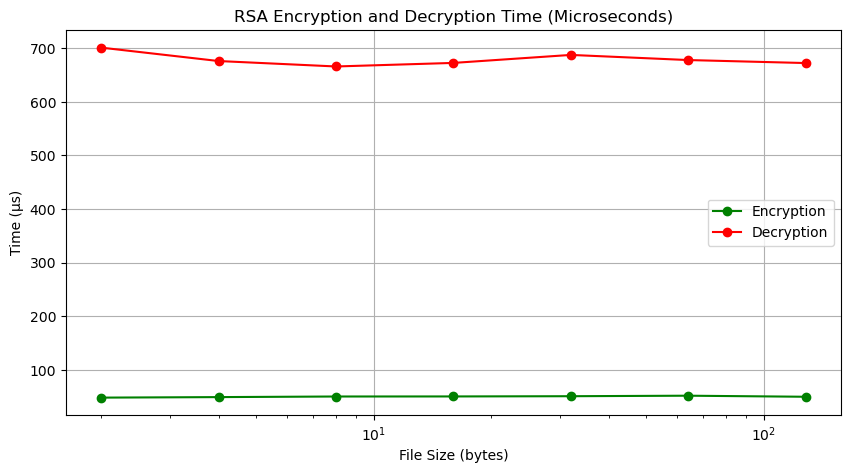

In [91]:
import os
import timeit
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import hashes

# Caminho da pasta contendo os arquivos gerados no exercício A
input_dir = "random_text_files"

# Gera par de chaves RSA 2048 bits
private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048)
public_key = private_key.public_key()

# Tamanhos de arquivos a serem testados
sizes_rsa = [2, 4, 8, 16, 32, 64, 128]

# Função para ler o conteúdo do arquivo
def read_file_contents(file_path):
    with open(file_path, "rb") as f:
        return f.read()

# Função de encriptação
def encrypt_rsa(data, public_key):
    return public_key.encrypt(
        data,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )

# Função de descriptação
def decrypt_rsa(encrypted_data, private_key):
    return private_key.decrypt(
        encrypted_data,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )

# Inicializar armazenamento de tempos
rsa_encryption_times = []
rsa_decryption_times = []

for size in sizes_rsa:
    file_path = os.path.join(input_dir, f"rsa_{size}.txt")
    
    if not os.path.exists(file_path):
        print(f"Arquivo não encontrado: {file_path}")
        continue  # Pula para o próximo tamanho

    data = read_file_contents(file_path)  # Lê os dados do arquivo
    iterations = 1000 if size <= 16 else 100  # Ajusta número de iterações
    
    # Medir tempo de criptografia em microssegundos
    enc_time = (timeit.timeit(lambda: encrypt_rsa(data, public_key), number=iterations) / iterations) * 1e6
    rsa_encryption_times.append(enc_time)
    
    # Criptografa os dados uma vez para medir a descriptografia
    encrypted_data = encrypt_rsa(data, public_key)
    
    # Medir tempo de descriptografia em microssegundos
    dec_time = (timeit.timeit(lambda: decrypt_rsa(encrypted_data, private_key), number=iterations) / iterations) * 1e6
    rsa_decryption_times.append(dec_time)
    
    print(f"Size: {size} bytes - Encryption: {enc_time:.6f} µs - Decryption: {dec_time:.6f} µs")

# Plotar os tempos de criptografia e descriptografia
print("\n")
plt.figure(figsize=(10, 5))
plt.plot(sizes_rsa, rsa_encryption_times, marker='o', color='green', label='Encryption')
plt.plot(sizes_rsa, rsa_decryption_times, marker='o', color='red', label='Decryption')
plt.xscale('log')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (µs)')  # Atualizado para microssegundos
plt.title('RSA Encryption and Decryption Time (Microseconds)')
plt.legend()
plt.grid(True)
plt.show()

The function encrypt_rsa(data, public_key) performs RSA encryption using a public key. The input data is encrypted using the OAEP (Optimal Asymmetric Encryption Padding) scheme with SHA-256 as the hashing algorithm.

RSA encryption ensures that only by using the private key you can read the message.

The function decrypt_rsa(encrypted_data, private_key) performs RSA decryption using the private key. The encrypted data is decrypted using OAEP padding with SHA-256. Since the encryption process follows a block-wise approach, the decryption must reverse this process, correctly handling each encrypted block.  

The script generates an RSA key pair with a size of 2048 bits. The public key is used for encryption, while the private key is used for decryption. A larger key size ensures stronger security but comes at the cost of computational overhead.

It iterates over different file sizes and measures the time taken for encryption and decryption using the timeit.timeit function.

### D. Measure the time for SHA-256 hash generation for the file sizes listed in part A.

Size: 8 bytes - Hash Time: 5.283200 μs
Size: 64 bytes - Hash Time: 5.420400 μs
Size: 512 bytes - Hash Time: 6.479300 μs
Size: 4096 bytes - Hash Time: 16.852000 μs
Size: 32768 bytes - Hash Time: 94.247000 μs
Size: 262144 bytes - Hash Time: 685.921000 μs
Size: 2097152 bytes - Hash Time: 4986.676000 μs




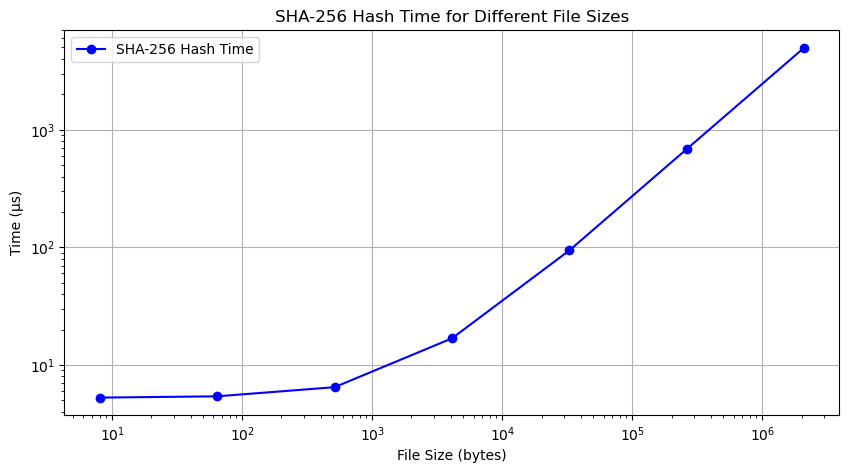

In [92]:
# Function to read file contents
def read_file_contents(file_path):
    with open(file_path, "rb") as f:
        return f.read()

# Function to compute SHA-256 hash
def sha256_hash(data):
    digest = hashes.Hash(hashes.SHA256())
    digest.update(data)
    return digest.finalize()

# Directory containing files
input_dir = "random_text_files"

# File sizes to be processed
sizes_sha = [8, 64, 512, 4096, 32768, 262144, 2097152]  

# List to store hashing times
hash_times = []

for i, size in enumerate(sizes_sha):
    file_path = os.path.join(input_dir, f"sha_{size}.txt")

    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue  # Skip to the next size

    data = read_file_contents(file_path)  # Read file data

    # Determine iteration count
    iterations = 1000 if i < 3 else 100

    # Measure hashing time
    hash_time = timeit.timeit(lambda: sha256_hash(data), number=iterations) / iterations
    hash_time_microseconds = hash_time * 1e6  # Convert to microseconds

    hash_times.append(hash_time_microseconds)

    print(f"Size: {size} bytes - Hash Time: {hash_time_microseconds:.6f} μs")

# Generate hash timing plot
print ("\n")
plt.figure(figsize=(10, 5))
plt.plot(sizes_sha, hash_times, marker='o', color='blue', label='SHA-256 Hash Time')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("File Size (bytes)")
plt.ylabel("Time (μs)")
plt.title("SHA-256 Hash Time for Different File Sizes")
plt.legend()
plt.grid(True)
plt.show()

The sha256_hash function computes the SHA-256 hash of a given binary data input. It initializes a hash object using hashes.Hash(hashes.SHA256()), updates it with the provided data, and finalizes the computation, returning the resulting digest.

For each file size, the script measures the average hashing time over multiple repetitions. The hashing time is determined by repeatedly calling sha256_hash(data) and computing the average duration across 1000 executions for files with 512 bytes or less, and 100 executions for files with more than 512 bytes.

The results show that hashing time increases almost linearly with file size, which is expected since SHA-256 processes data in 512-bit blocks. Initially, the hashing time is almost constant for small file sizes (due to overhead in function calls), but as file sizes grow, the processing time increases as well. 

### Comparison between AES encryption and RSA encryption

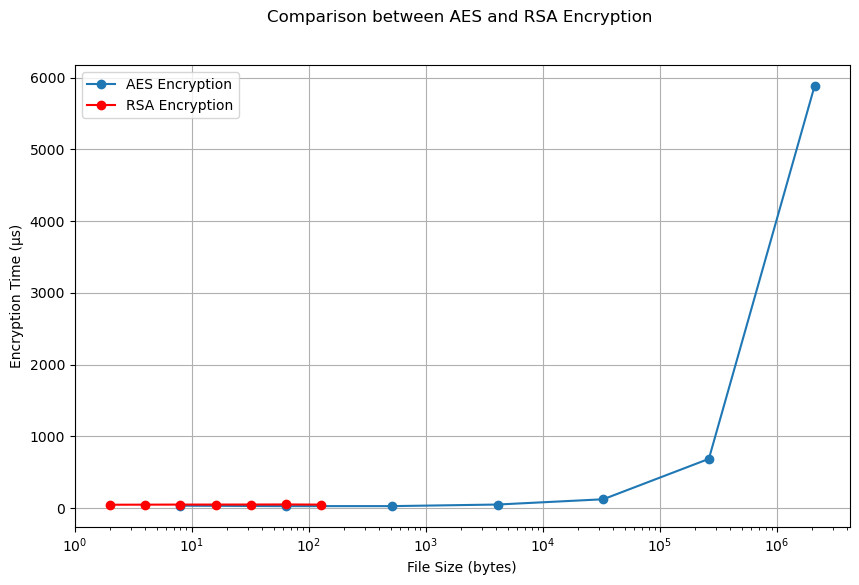

In [93]:
print("\n")
plt.figure(figsize=(10, 6))
plt.plot(sizes_aes, aes_encryption_times, marker='o', label='AES Encryption')
plt.plot(sizes_rsa, rsa_encryption_times, marker='o', label='RSA Encryption', color = "red")
plt.xscale('log')
plt.xlabel('File Size (bytes)')
plt.ylabel('Encryption Time (µs)')
plt.title('Comparison between AES and RSA Encryption \n\n')
plt.legend()
plt.grid(True)
plt.show()

AES encryption exhibits a noticeable increase in time as file size grows, whereas RSA encryption remains relatively stable. This behavior is expected due to fundamental differences in their design.

AES is a symmetric encryption algorithm designed for high performance and efficiency. It encrypts data in fixed-size blocks of 128 bits (16 bytes), processing one block at a time. The graph shows that AES encryption performs very quickly for small files, where only a few blocks need to be processed. However, as file size increases, the number of blocks grows proportionally, leading to a noticeable increase in total encryption time.

On the other hand, RSA encryption operates on fixed-size data blocks determined by the key size, which explains why its performance remains relatively constant regardless of file size. However, RSA is computationally expensive due to the use of large prime numbers and modular exponentiation, making it inefficient for bulk data encryption. 

The trend observed in the graph aligns with best practices in cryptography, where RSA is often combined with AES in hybrid encryption schemes to leverage the strengths of both algorithms.

### Comparison between AES encryption and SHA digest generation

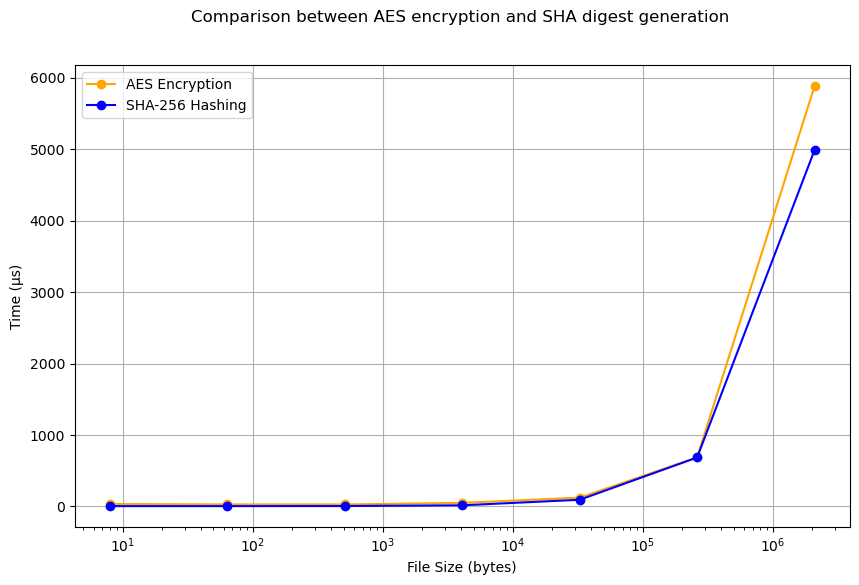

In [94]:
print("\n")
plt.figure(figsize=(10, 6))
plt.plot(sizes_aes, aes_encryption_times, marker='o', label='AES Encryption', color = "orange")
plt.plot(sizes_sha, hash_times, marker='o', label='SHA-256 Hashing', color = "blue")
plt.xscale('log')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (µs)')
plt.title('Comparison between AES encryption and SHA digest generation \n\n')
plt.legend()
plt.grid(True)
plt.show()

As we can see in the graph, for file sizes ranging from 10^1 to 10^5 bytes, AES encryption and SHA-256 hashing times are similar, remanining below 1000 µs. This indicates that initialization overheads, such as setting up buffers, likely dominate the performance at these smaller scales, where the computational differences between the two algorithms are less pronounced.

However, as file sizes increase beyond 10^5 bytes, a significant divergence sarts to emerge. SHA-256 hashing times rise sharply, reaching approximately 5000 µs at 10^6 bytes, while AES encryption time, peaks at around 6000 µs for the same file size.



### Comparison between RSA Encryption and decryption times

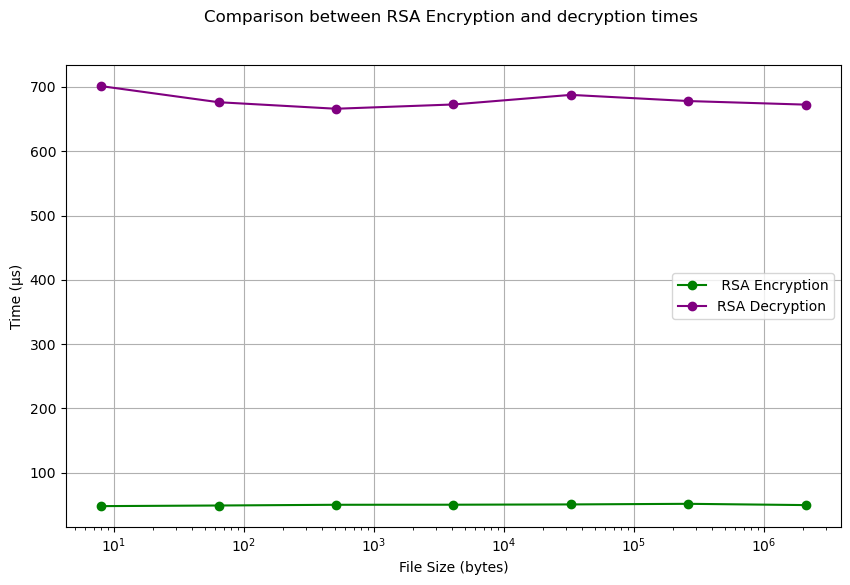

In [95]:
print("\n")
plt.figure(figsize=(10, 6))
plt.plot(sizes_aes, rsa_encryption_times, marker='o', label=' RSA Encryption', color= "green")
plt.plot(sizes_sha, rsa_decryption_times, marker='o', label='RSA Decryption', color = "purple")
plt.xscale('log')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (µs)')
plt.title('Comparison between RSA Encryption and decryption times \n\n')
plt.legend()
plt.grid(True)
plt.show()

The graph compares RSA encryption and decryption times for file sizes from 10¹ to 10⁶ bytes. RSA encryption times remain steady at averaging less than 100 µs across all sizes. In contrast, RSA decryption times are much higher, ranging from 600 to 700 µs, with a slight decrease as file size increases, but still 7 times slower than encryption.

This performance gap stems from RSA’s asymmetric design, meaning that the keys used for encryption and decryption are different from each other. Encryption uses a small public exponent, requiring fewer computations, while decryption uses a larger private exponent, leading to more intensive modular exponentiation

In asymmetric cryptography like RSA, encryption and decryption operations are asymmetrically related, meaning that the keys used for encryption and decryption are different from each other.

## Experimental Setup 

### Hardware
- Processor: i7-9750H CPU @ 2.60GHz (12 CPUs), ~2.6GHz
- RAM: 16384MB
- Storage: 1 TB
### Operating System 
- Windows 11 Home 64 bits
### Python Version
- Python Version : 3.11.0
### Libraries Used
- cryptography
- matplotlib (data  vis.)
- timeit (time measurement)




***This report was prepared by Rui Coelho and Sérgio Coelho as part of the Security and Privacy course, within the Bachelor's Degree in Computer Science at the Faculty of Sciences of the University of Porto.***